# An optimization using Simulated Annealing for Rastrigin function

## Importing libraries

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from visual import histeq

## Defining functions

### Rastrigin function

In [2]:
def rastrigin_function(x,y):
    '''
    Calculate the rosenbrock map.   
    
    '''
    p1 = x
    p2 = y
    z = 20. + p1**2 + p2**2 - 10.*np.cos(2.*np.pi*p1) - 10.*np.cos(2.*np.pi*p2)
    return z

In [3]:
def rastrigin(p):
    '''
    Calculate the rosenbrock function.   
    
    '''
    p1 = p[0]
    p2 = p[1]
    z = 20. + p1**2 + p2**2 - 10.*np.cos(2.*np.pi*p1) - 10.*np.cos(2.*np.pi*p2)
    return z

## Parameters for calculating the rastrigin function 

In [4]:
Nx = 50
Ny = 50

In [5]:
x = np.linspace(-5.,5.,num=Nx)
y = np.linspace(-5.,5.,num=Ny)
X,Y = np.meshgrid(x,y)

In [6]:
Z = rastrigin_function(X,Y) 

In [7]:
Z_ras = histeq(Z).reshape(Nx,Ny)

## Visuatization of the Rastrigin function 


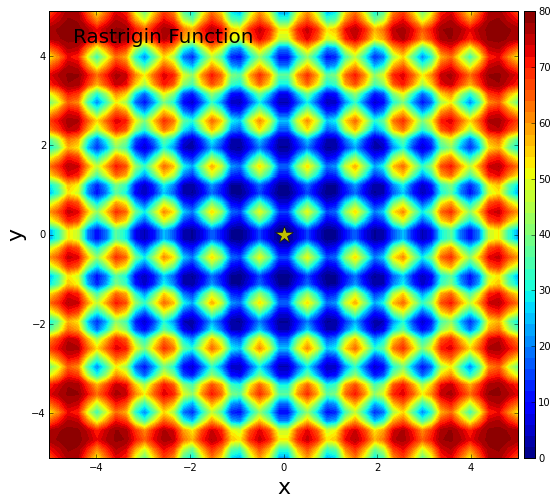

In [8]:
title_font = 22
bottom_font = 16
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(10,8))
plt.contourf(X, Y, Z_ras, 50)
plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
plt.plot(0., 0., '*y',markersize=18)
plt.xlabel('x', fontsize = title_font)
plt.ylabel('y', fontsize = title_font)
plt.annotate('Rastrigin Function', xy = (0.05, 0.93), xycoords = 'axes fraction', fontsize=20)

plt.show()


## Calculating the Simulated Annealing for Rastrigin function

### Parameters for the algorithm

In [9]:
itmax = 100
it = 30

# initial approximation and initial temperature
p0 = np.array([3.8,4.8]).reshape(2,)
phi0 = rastrigin(p0)
T = 3000.

# Lists of information about phi and p0

px = [p0[0]]
py = [p0[1]]

# List of phi
phi_it = []


### SA Algorithm

In [10]:
for i in range(itmax):
    phi0 = rastrigin(p0)
    for j in range(it):
        rand = 2.*np.random.random(2) - 1.
        p_new = p0 + rand
        phi_new = rastrigin(p_new)
        dphi = phi_new - phi0
        if dphi <= 0.:
            p = p_new
            phi = phi_new
            break
        elif dphi > 0:
            P = np.exp(-dphi/T)
            r = np.random.random(1)
            if r <= P:
                p = p_new
                phi = phi_new
                
    alpha = 0.2
    T = alpha*T
    p0 = p
    phi0 = phi
    
    phi_it.append(phi)
    px.append(p0[0])
    py.append(p0[1])

In [11]:
print p0

[ 0.02241484  0.01382151]


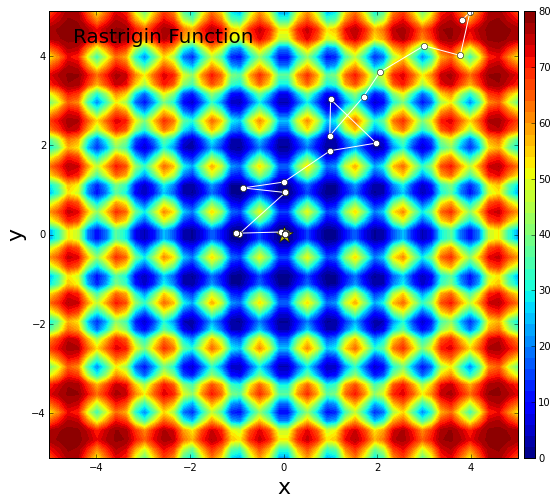

In [14]:
title_font = 22
bottom_font = 16
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(10,8))
plt.contourf(X, Y, Z_ras, 50)
plt.plot(0., 0., '*y',markersize=18)
plt.plot(px,py,'wo-')
plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
plt.xlabel('x', fontsize = title_font)
plt.ylabel('y', fontsize = title_font)
plt.annotate('Rastrigin Function', xy = (0.05, 0.93), xycoords = 'axes fraction', fontsize=20)

plt.show()

## Analysis of convergence

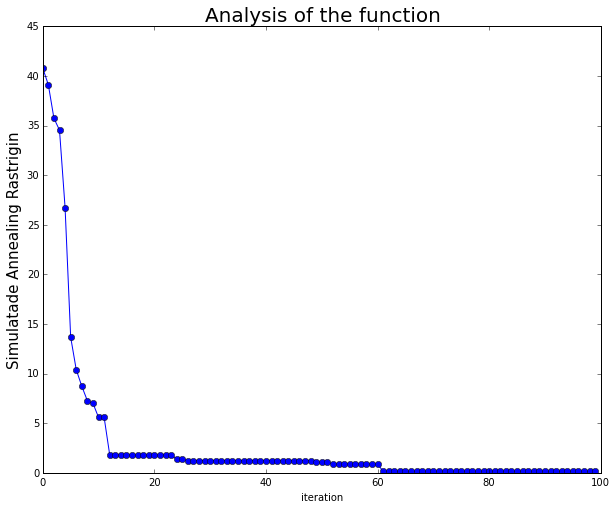

In [15]:
plt.figure(figsize=(10,8))

plt.plot(phi_it, 'o-')
plt.title('Analysis of the function',fontsize=20)
plt.ylabel('Simulatade Annealing Rastrigin',fontsize=15)
plt.xlabel('iteration',)

plt.show()
